Data Cleaning Transforming Extraction

In [91]:
import numpy as np
import pandas as pd
import math
import sys, os
sys.path.append(os.path.abspath(os.path.join('../scripts/')))
print(sys.path[-1])
from cleaning_data import CleanTelco
from plotting import PlotDataFrame
from dbconnection import create_database_connection, read_data_into_dataframe

c:\Users\hp\Documents\10 Academy\week 1\Telecommunication User Analytics\scripts


In [92]:
#Initialize CleanTelco instance
df_cleaner = CleanTelco()
#Initialize Plot helper
my_pltotter = PlotDataFrame()

engine = create_database_connection()
df_tele=read_data_into_dataframe(engine, "xdr_data")
#rawdf.head(5)
df_tele

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,...,1.585461e+07,2.501332e+06,8.198936e+06,9.656251e+06,2.780823e+08,1.434415e+07,1.717444e+08,8.814393e+06,36749741.0,308879636.0
1,1.311448e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,2.024740e+07,1.911173e+07,1.833841e+07,1.722713e+07,6.087501e+08,1.170709e+06,5.269042e+08,1.505514e+07,53800391.0,653384965.0
2,1.311448e+19,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,1.972566e+07,1.469958e+07,1.758779e+07,6.163408e+06,2.295846e+08,3.956300e+05,4.106926e+08,4.215763e+06,27883638.0,279807335.0
3,1.311448e+19,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,2.138812e+07,1.514664e+07,1.399465e+07,1.097942e+06,7.995382e+08,1.084972e+07,7.490399e+08,1.279728e+07,43324218.0,846028530.0
4,1.311448e+19,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,1.525938e+07,1.896287e+07,1.712458e+07,4.152180e+05,5.277072e+08,3.529801e+06,5.507095e+08,1.391032e+07,38542814.0,569138589.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149996,7.277826e+18,4/29/2019 7:28,451.0,4/30/2019 6:02,214.0,81230.0,2.082022e+14,3.365069e+10,3.548311e+13,D20434A,...,1.619167e+07,1.176343e+07,1.788370e+07,1.967816e+07,5.266097e+08,9.197207e+06,3.264510e+06,1.348742e+07,57628851.0,574175259.0
149997,7.349883e+18,4/29/2019 7:28,483.0,4/30/2019 10:41,187.0,97970.0,2.082019e+14,3.366345e+10,3.566051e+13,D10223C,...,1.387723e+07,8.288284e+06,1.935015e+07,2.129315e+07,6.268931e+08,4.735033e+06,7.121804e+08,2.457758e+06,39135081.0,666648844.0
149998,1.311448e+19,4/29/2019 7:28,283.0,4/30/2019 10:46,810.0,98249.0,2.082017e+14,3.362189e+10,3.572121e+13,T51102A,...,2.266051e+07,1.855903e+06,9.963942e+06,5.065760e+06,5.535395e+08,1.339432e+07,1.211009e+08,1.131473e+07,34912224.0,592786405.0
149999,1.311448e+19,4/29/2019 7:28,696.0,4/30/2019 10:40,327.0,97910.0,2.082021e+14,3.361962e+10,8.618620e+13,L88342B,...,8.817106e+06,8.305402e+06,3.322253e+06,1.317259e+07,3.525370e+08,2.529475e+06,8.147131e+08,1.406930e+06,29626096.0,371895920.0


In [93]:
#Field Description
df_tele_field_description = pd.read_excel("../data/field_descriptions.xlsx")
df_tele_field_description

,Fields,Description
0,bearer id,xDr session identifier
1,Dur. (ms),Total Duration of the xDR (in ms)
2,Start,Start time of the xDR (first frame timestamp)
3,Start ms,Milliseconds offset of start time for the xDR ...
4,End,End time of the xDR (last frame timestamp)
5,End ms,Milliseconds offset of end time of the xDR (la...
6,Dur. (s),Total Duration of the xDR (in s)
7,IMSI,International Mobile Subscriber Identity
8,MSISDN/Number,MS International PSTN/ISDN Number of mobile - ...
9,IMEI,International Mobile Equipment Identity


In [94]:
df_tele.columns.to_list()



['Bearer Id',
 'Start',
 'Start ms',
 'End',
 'End ms',
 'Dur. (ms)',
 'IMSI',
 'MSISDN/Number',
 'IMEI',
 'Last Location Name',
 'Avg RTT DL (ms)',
 'Avg RTT UL (ms)',
 'Avg Bearer TP DL (kbps)',
 'Avg Bearer TP UL (kbps)',
 'TCP DL Retrans. Vol (Bytes)',
 'TCP UL Retrans. Vol (Bytes)',
 'DL TP < 50 Kbps (%)',
 '50 Kbps < DL TP < 250 Kbps (%)',
 '250 Kbps < DL TP < 1 Mbps (%)',
 'DL TP > 1 Mbps (%)',
 'UL TP < 10 Kbps (%)',
 '10 Kbps < UL TP < 50 Kbps (%)',
 '50 Kbps < UL TP < 300 Kbps (%)',
 'UL TP > 300 Kbps (%)',
 'HTTP DL (Bytes)',
 'HTTP UL (Bytes)',
 'Activity Duration DL (ms)',
 'Activity Duration UL (ms)',
 'Dur. (ms).1',
 'Handset Manufacturer',
 'Handset Type',
 'Nb of sec with 125000B < Vol DL',
 'Nb of sec with 1250B < Vol UL < 6250B',
 'Nb of sec with 31250B < Vol DL < 125000B',
 'Nb of sec with 37500B < Vol UL',
 'Nb of sec with 6250B < Vol DL < 31250B',
 'Nb of sec with 6250B < Vol UL < 37500B',
 'Nb of sec with Vol DL < 6250B',
 'Nb of sec with Vol UL < 1250B',
 'Socia

In [95]:
df_tele.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 55 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   Bearer Id                                 149010 non-null  float64
 1   Start                                     150000 non-null  object 
 2   Start ms                                  150000 non-null  float64
 3   End                                       150000 non-null  object 
 4   End ms                                    150000 non-null  float64
 5   Dur. (ms)                                 150000 non-null  float64
 6   IMSI                                      149431 non-null  float64
 7   MSISDN/Number                             148935 non-null  float64
 8   IMEI                                      149429 non-null  float64
 9   Last Location Name                        148848 non-null  object 
 10  Avg RTT DL (ms)     

Data Cleaning

In [96]:

df_tele.shape

(150001, 55)

In [97]:
df_tele.rename(columns={'Dur. (ms)': 'Dur (s)', 'Dur. (ms).1': 'Dur (ms)'}, inplace=True)
df_tele.columns.tolist()

['Bearer Id',
 'Start',
 'Start ms',
 'End',
 'End ms',
 'Dur (s)',
 'IMSI',
 'MSISDN/Number',
 'IMEI',
 'Last Location Name',
 'Avg RTT DL (ms)',
 'Avg RTT UL (ms)',
 'Avg Bearer TP DL (kbps)',
 'Avg Bearer TP UL (kbps)',
 'TCP DL Retrans. Vol (Bytes)',
 'TCP UL Retrans. Vol (Bytes)',
 'DL TP < 50 Kbps (%)',
 '50 Kbps < DL TP < 250 Kbps (%)',
 '250 Kbps < DL TP < 1 Mbps (%)',
 'DL TP > 1 Mbps (%)',
 'UL TP < 10 Kbps (%)',
 '10 Kbps < UL TP < 50 Kbps (%)',
 '50 Kbps < UL TP < 300 Kbps (%)',
 'UL TP > 300 Kbps (%)',
 'HTTP DL (Bytes)',
 'HTTP UL (Bytes)',
 'Activity Duration DL (ms)',
 'Activity Duration UL (ms)',
 'Dur (ms)',
 'Handset Manufacturer',
 'Handset Type',
 'Nb of sec with 125000B < Vol DL',
 'Nb of sec with 1250B < Vol UL < 6250B',
 'Nb of sec with 31250B < Vol DL < 125000B',
 'Nb of sec with 37500B < Vol UL',
 'Nb of sec with 6250B < Vol DL < 31250B',
 'Nb of sec with 6250B < Vol UL < 37500B',
 'Nb of sec with Vol DL < 6250B',
 'Nb of sec with Vol UL < 1250B',
 'Social Med

In [98]:

df_tele_missing = df_cleaner.get_missing_values(df_tele)
df_tele_missing

2023-12-29 11:45:15,217:logger:Get missing values


,column_name,percent_missing
Youtube DL (Bytes),Youtube DL (Bytes),0.000000
Other UL (Bytes),Other UL (Bytes),0.000000
Other DL (Bytes),Other DL (Bytes),0.000000
Gaming UL (Bytes),Gaming UL (Bytes),0.000000
Gaming DL (Bytes),Gaming DL (Bytes),0.000000
Netflix UL (Bytes),Netflix UL (Bytes),0.000000
Netflix DL (Bytes),Netflix DL (Bytes),0.000000
Youtube UL (Bytes),Youtube UL (Bytes),0.000000
Email UL (Bytes),Email UL (Bytes),0.000000
Email DL (Bytes),Email DL (Bytes),0.000000


In [99]:
# def get_missing_percentage(df: pd.DataFrame) -> pd.DataFrame:   
    
#     # missing_percentage = (df.isnull().mean() * 100).round(2)
#     missing_percentage = df.isnull().sum() * 100 / len(df)
#     missing_value_df = pd.DataFrame({'column_name': df.columns,
#                                             'percent_missing': missing_percentage})

#     missing_value_df.sort_values('percent_missing', inplace=True)
    
#     return missing_value_df

  

In [100]:

# df_tele_missing = df_cleaner.get_missing_values(df_tele)
# df_tele_missing

In [101]:
#It is recommended to remove columns with more than 30% of missing values
df_tele_cols_to_remove = df_tele_missing[df_tele_missing['percent_missing'] >= 30].index.tolist()
df_tele_cols_to_remove

     

['HTTP DL (Bytes)',
 'HTTP UL (Bytes)',
 'TCP DL Retrans. Vol (Bytes)',
 'Nb of sec with 6250B < Vol DL < 31250B',
 'Nb of sec with 1250B < Vol UL < 6250B',
 'Nb of sec with 31250B < Vol DL < 125000B',
 'TCP UL Retrans. Vol (Bytes)',
 'Nb of sec with 125000B < Vol DL',
 'Nb of sec with 6250B < Vol UL < 37500B',
 'Nb of sec with 37500B < Vol UL']

In [102]:
df_telco_cols_to_remove = [col for col in df_tele_cols_to_remove if col not in ['TCP UL Retrans. Vol (Bytes)',
    'TCP DL Retrans. Vol (Bytes)']]
df_telco_cols_to_remove
#Since we will use TCP variables for later analysis we opt to fill them accordingly than removing the column. 

['HTTP DL (Bytes)',
 'HTTP UL (Bytes)',
 'Nb of sec with 6250B < Vol DL < 31250B',
 'Nb of sec with 1250B < Vol UL < 6250B',
 'Nb of sec with 31250B < Vol DL < 125000B',
 'Nb of sec with 125000B < Vol DL',
 'Nb of sec with 6250B < Vol UL < 37500B',
 'Nb of sec with 37500B < Vol UL']

In [103]:
df_tele_clean = df_tele.drop(df_telco_cols_to_remove, axis=1)
df_tele_clean.shape

(150001, 47)

In [104]:
df_tele_missing = df_cleaner.get_missing_values(df_tele_clean)
df_tele_missing

2023-12-29 11:45:15,605:logger:Get missing values


,column_name,percent_missing
Google UL (Bytes),Google UL (Bytes),0.000000
Netflix DL (Bytes),Netflix DL (Bytes),0.000000
Netflix UL (Bytes),Netflix UL (Bytes),0.000000
Youtube DL (Bytes),Youtube DL (Bytes),0.000000
Email UL (Bytes),Email UL (Bytes),0.000000
Gaming DL (Bytes),Gaming DL (Bytes),0.000000
Gaming UL (Bytes),Gaming UL (Bytes),0.000000
Other DL (Bytes),Other DL (Bytes),0.000000
Google DL (Bytes),Google DL (Bytes),0.000000
Other UL (Bytes),Other UL (Bytes),0.000000


In [105]:
#We still have plenty missing values in TCP variables 
     
#Since the TCP variables has high percentage of missing values, we can not impute them with median or mean which means making the majority values
# equal to a single value because our data will be heavily biased. So the right way is to use forward fill technique or backward fill technique.
# We will use backward fill technique 
df_cleaner.fix_missing_bfill(df_tele_clean, 'TCP DL Retrans. Vol (Bytes)')
df_cleaner.fix_missing_bfill(df_tele_clean, 'TCP UL Retrans. Vol (Bytes)')

c:\Users\hp\Documents\10 Academy\week 1\Telecommunication User Analytics\scripts\cleaning_data.py:93: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df[col_name] = df[col_name].fillna(method='bfill')
2023-12-29 11:45:15,680:logger:bfill fix missing
2023-12-29 11:45:15,688:logger:bfill fix missing


,Bearer Id,Start,Start ms,End,End ms,Dur (s),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,...,1.585461e+07,2.501332e+06,8.198936e+06,9.656251e+06,2.780823e+08,1.434415e+07,1.717444e+08,8.814393e+06,36749741.0,308879636.0
1,1.311448e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,2.024740e+07,1.911173e+07,1.833841e+07,1.722713e+07,6.087501e+08,1.170709e+06,5.269042e+08,1.505514e+07,53800391.0,653384965.0
2,1.311448e+19,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,1.972566e+07,1.469958e+07,1.758779e+07,6.163408e+06,2.295846e+08,3.956300e+05,4.106926e+08,4.215763e+06,27883638.0,279807335.0
3,1.311448e+19,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,2.138812e+07,1.514664e+07,1.399465e+07,1.097942e+06,7.995382e+08,1.084972e+07,7.490399e+08,1.279728e+07,43324218.0,846028530.0
4,1.311448e+19,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,1.525938e+07,1.896287e+07,1.712458e+07,4.152180e+05,5.277072e+08,3.529801e+06,5.507095e+08,1.391032e+07,38542814.0,569138589.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149996,7.277826e+18,4/29/2019 7:28,451.0,4/30/2019 6:02,214.0,81230.0,2.082022e+14,3.365069e+10,3.548311e+13,D20434A,...,1.619167e+07,1.176343e+07,1.788370e+07,1.967816e+07,5.266097e+08,9.197207e+06,3.264510e+06,1.348742e+07,57628851.0,574175259.0
149997,7.349883e+18,4/29/2019 7:28,483.0,4/30/2019 10:41,187.0,97970.0,2.082019e+14,3.366345e+10,3.566051e+13,D10223C,...,1.387723e+07,8.288284e+06,1.935015e+07,2.129315e+07,6.268931e+08,4.735033e+06,7.121804e+08,2.457758e+06,39135081.0,666648844.0
149998,1.311448e+19,4/29/2019 7:28,283.0,4/30/2019 10:46,810.0,98249.0,2.082017e+14,3.362189e+10,3.572121e+13,T51102A,...,2.266051e+07,1.855903e+06,9.963942e+06,5.065760e+06,5.535395e+08,1.339432e+07,1.211009e+08,1.131473e+07,34912224.0,592786405.0
149999,1.311448e+19,4/29/2019 7:28,696.0,4/30/2019 10:40,327.0,97910.0,2.082021e+14,3.361962e+10,8.618620e+13,L88342B,...,8.817106e+06,8.305402e+06,3.322253e+06,1.317259e+07,3.525370e+08,2.529475e+06,8.147131e+08,1.406930e+06,29626096.0,371895920.0


In [106]:
# Calculate and print the skewness for 'Avg RTT DL (ms)'
avg_rtt_dl_skewness = df_tele_clean['Avg RTT DL (ms)'].skew(skipna=True)
print(f"Avg RTT DL (ms) Skewness: {avg_rtt_dl_skewness}")

# Calculate and print the skewness for 'Avg RTT UL (ms)'
avg_rtt_ul_skewness = df_tele_clean['Avg RTT UL (ms)'].skew(skipna=True)
print(f"Avg RTT UL (ms) Skewness: {avg_rtt_ul_skewness}")

Avg RTT DL (ms) Skewness: 62.907828079959614
Avg RTT UL (ms) Skewness: 28.457414585463813


In [107]:
# Forward-fill missing values for 'Avg RTT DL (ms)'
df_cleaner.fix_missing_ffill(df_tele_clean, 'Avg RTT DL (ms)')

# Forward-fill missing values for 'Avg RTT UL (ms)'
df_cleaner.fix_missing_ffill(df_tele_clean, 'Avg RTT UL (ms)')

c:\Users\hp\Documents\10 Academy\week 1\Telecommunication User Analytics\scripts\cleaning_data.py:84: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df[col_name] = df[col_name].fillna(method='ffill')
2023-12-29 11:45:16,094:logger:ffil fix missing
2023-12-29 11:45:16,101:logger:ffil fix missing


,Bearer Id,Start,Start ms,End,End ms,Dur (s),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,...,1.585461e+07,2.501332e+06,8.198936e+06,9.656251e+06,2.780823e+08,1.434415e+07,1.717444e+08,8.814393e+06,36749741.0,308879636.0
1,1.311448e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,2.024740e+07,1.911173e+07,1.833841e+07,1.722713e+07,6.087501e+08,1.170709e+06,5.269042e+08,1.505514e+07,53800391.0,653384965.0
2,1.311448e+19,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,1.972566e+07,1.469958e+07,1.758779e+07,6.163408e+06,2.295846e+08,3.956300e+05,4.106926e+08,4.215763e+06,27883638.0,279807335.0
3,1.311448e+19,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,2.138812e+07,1.514664e+07,1.399465e+07,1.097942e+06,7.995382e+08,1.084972e+07,7.490399e+08,1.279728e+07,43324218.0,846028530.0
4,1.311448e+19,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,1.525938e+07,1.896287e+07,1.712458e+07,4.152180e+05,5.277072e+08,3.529801e+06,5.507095e+08,1.391032e+07,38542814.0,569138589.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149996,7.277826e+18,4/29/2019 7:28,451.0,4/30/2019 6:02,214.0,81230.0,2.082022e+14,3.365069e+10,3.548311e+13,D20434A,...,1.619167e+07,1.176343e+07,1.788370e+07,1.967816e+07,5.266097e+08,9.197207e+06,3.264510e+06,1.348742e+07,57628851.0,574175259.0
149997,7.349883e+18,4/29/2019 7:28,483.0,4/30/2019 10:41,187.0,97970.0,2.082019e+14,3.366345e+10,3.566051e+13,D10223C,...,1.387723e+07,8.288284e+06,1.935015e+07,2.129315e+07,6.268931e+08,4.735033e+06,7.121804e+08,2.457758e+06,39135081.0,666648844.0
149998,1.311448e+19,4/29/2019 7:28,283.0,4/30/2019 10:46,810.0,98249.0,2.082017e+14,3.362189e+10,3.572121e+13,T51102A,...,2.266051e+07,1.855903e+06,9.963942e+06,5.065760e+06,5.535395e+08,1.339432e+07,1.211009e+08,1.131473e+07,34912224.0,592786405.0
149999,1.311448e+19,4/29/2019 7:28,696.0,4/30/2019 10:40,327.0,97910.0,2.082021e+14,3.361962e+10,8.618620e+13,L88342B,...,8.817106e+06,8.305402e+06,3.322253e+06,1.317259e+07,3.525370e+08,2.529475e+06,8.147131e+08,1.406930e+06,29626096.0,371895920.0


In [108]:
# Get a DataFrame with information about missing values
df_tele_missing = df_cleaner.get_missing_values(df_tele_clean)

# Display the DataFrame
df_tele_missing





2023-12-29 11:45:16,473:logger:Get missing values


,column_name,percent_missing
Youtube UL (Bytes),Youtube UL (Bytes),0.000000
Gaming DL (Bytes),Gaming DL (Bytes),0.000000
Netflix UL (Bytes),Netflix UL (Bytes),0.000000
Avg RTT UL (ms),Avg RTT UL (ms),0.000000
Avg RTT DL (ms),Avg RTT DL (ms),0.000000
Gaming UL (Bytes),Gaming UL (Bytes),0.000000
Netflix DL (Bytes),Netflix DL (Bytes),0.000000
Other DL (Bytes),Other DL (Bytes),0.000000
Social Media DL (Bytes),Social Media DL (Bytes),0.000000
Social Media UL (Bytes),Social Media UL (Bytes),0.000000


In [109]:
#Dropping rows having missing values since they are small, they won't affect the data frame
#generally acceptable to remove rows with missing values, especially if the missing percentage is very small. 

df_tele_clean.dropna(inplace=True)
# Get a DataFrame with information about missing values
df_tele_missing = df_cleaner.get_missing_values(df_tele_clean)

# Display the DataFrame
df_tele_missing


2023-12-29 11:45:16,838:logger:Get missing values


,column_name,percent_missing
Bearer Id,Bearer Id,0.0
Activity Duration UL (ms),Activity Duration UL (ms),0.0
Dur (ms),Dur (ms),0.0
Handset Manufacturer,Handset Manufacturer,0.0
Handset Type,Handset Type,0.0
Nb of sec with Vol DL < 6250B,Nb of sec with Vol DL < 6250B,0.0
Nb of sec with Vol UL < 1250B,Nb of sec with Vol UL < 1250B,0.0
Social Media DL (Bytes),Social Media DL (Bytes),0.0
Social Media UL (Bytes),Social Media UL (Bytes),0.0
Google DL (Bytes),Google DL (Bytes),0.0


In [110]:
df_tele_clean.shape


(146887, 47)

In [111]:
df_tele_clean.head()

,Bearer Id,Start,Start ms,End,End ms,Dur (s),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.311448e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,1.311448e+19,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,1.311448e+19,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,1.311448e+19,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


In [112]:
# We can see that columns 'Start' and 'End" can be converted to pandas datetime
df_tele_clean = df_cleaner.convert_to_datetime(df_tele_clean, 'Start')
df_tele_clean = df_cleaner.convert_to_datetime(df_tele_clean, 'End')

2023-12-29 11:45:18,459:logger:Converted to datetime
2023-12-29 11:45:18,583:logger:Converted to datetime


In [113]:
"""
Unique identification numbers, such as identifiers or codes, are typically integers. 
Converting them to integers accurately reflects the nature of the data. 
Using floats for these values can introduce unnecessary decimal points, which might be misleading.
"""
df_tele_clean = df_cleaner.convert_to_integer(df_tele_clean, 'Bearer Id')
df_tele_clean = df_cleaner.convert_to_integer(df_tele_clean, 'IMSI')
df_tele_clean = df_cleaner.convert_to_integer(df_tele_clean, 'IMEI')
df_tele_clean = df_cleaner.convert_to_integer(df_tele_clean, 'MSISDN/Number')

2023-12-29 11:45:18,608:logger:Converted to integer
2023-12-29 11:45:18,615:logger:Converted to integer
2023-12-29 11:45:18,618:logger:Converted to integer
2023-12-29 11:45:18,628:logger:Converted to integer


In [114]:
df_tele_clean

,Bearer Id,Start,Start ms,End,End ms,Dur (s),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,-9223372036854775808,2019-04-04 12:01:00,770.0,2019-04-25 14:35:00,662.0,1823652.0,208201448079117,33664962239,35521209507511,9.16456699548519E+015,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,-9223372036854775808,2019-04-09 13:04:00,235.0,2019-04-25 08:15:00,606.0,1365104.0,208201909211140,33681854413,35794009006359,L77566A,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,-9223372036854775808,2019-04-09 17:42:00,1.0,2019-04-25 11:58:00,652.0,1361762.0,208200314458056,33760627129,35281510359387,D42335A,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,-9223372036854775808,2019-04-10 00:31:00,486.0,2019-04-25 07:36:00,171.0,1321509.0,208201402342131,33750343200,35356610164913,T21824A,...,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,-9223372036854775808,2019-04-12 20:10:00,565.0,2019-04-25 10:40:00,954.0,1089009.0,208201401415120,33699795932,35407009745539,D88865A,...,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149991,7349883264234529792,2019-04-29 07:28:00,794.0,2019-04-30 00:36:00,523.0,61661.0,208201716588303,33762146363,35860607430880,D10033B,...,7404819.0,9864285.0,18954727.0,19382787.0,258688968.0,9542486.0,249358264.0,14134902.0,57231077.0,295424923.0
149992,-9223372036854775808,2019-04-29 07:28:00,114.0,2019-04-30 07:04:00,724.0,84940.0,208201402149148,33761274518,35327007109396,D78058B,...,22428728.0,14385815.0,6940672.0,6801943.0,35738570.0,7842728.0,808482329.0,12135519.0,45923464.0,70341448.0
149993,-9223372036854775808,2019-04-29 07:28:00,79.0,2019-04-30 18:22:00,512.0,125622.0,208201402072093,33626114091,35735309473406,D73542B,...,18144703.0,8161828.0,20559422.0,20415237.0,569668054.0,1618788.0,168292600.0,11056036.0,43629118.0,623318363.0
149994,-9223372036854775808,2019-04-29 07:28:00,83.0,2019-04-30 15:01:00,268.0,113545.0,208200313074099,33645655643,35155409288696,T88383B,...,23043782.0,19176074.0,18762809.0,9591310.0,810666072.0,14858904.0,777865837.0,14693970.0,59377936.0,862796008.0


In [115]:
"""
"object" dtype is a more general category that can include other types of data
 and it is not as efficient as using the "string" dtype

"""
df_tele_clean = df_cleaner.convert_to_string(df_tele_clean, 'Last Location Name')
df_tele_clean = df_cleaner.convert_to_string(df_tele_clean, 'Handset Manufacturer')
df_tele_clean = df_cleaner.convert_to_string(df_tele_clean, 'Handset Type')

2023-12-29 11:45:18,909:logger:Converted to string
2023-12-29 11:45:18,942:logger:Converted to string


2023-12-29 11:45:18,988:logger:Converted to string


In [116]:
df_tele_clean.dtypes

Bearer Id                                  int64
Start                             datetime64[ns]
Start ms                                 float64
End                               datetime64[ns]
End ms                                   float64
Dur (s)                                  float64
IMSI                                       int64
MSISDN/Number                              int64
IMEI                                       int64
Last Location Name                string[python]
Avg RTT DL (ms)                          float64
Avg RTT UL (ms)                          float64
Avg Bearer TP DL (kbps)                  float64
Avg Bearer TP UL (kbps)                  float64
TCP DL Retrans. Vol (Bytes)              float64
TCP UL Retrans. Vol (Bytes)              float64
DL TP < 50 Kbps (%)                      float64
50 Kbps < DL TP < 250 Kbps (%)           float64
250 Kbps < DL TP < 1 Mbps (%)            float64
DL TP > 1 Mbps (%)                       float64
UL TP < 10 Kbps (%) 

Dropping Dupplicates

In [117]:

df_tele_clean = df_cleaner.drop_duplicate(df_tele_clean)
df_tele_clean.shape

2023-12-29 11:45:20,281:logger:Dropped duplicates


(146887, 47)

In [118]:
#Dur (ms) holds the same value as Dur (s) interms of measurement 
df_tele_clean = df_cleaner.drop_column(df_tele_clean, 'Dur (s)')


2023-12-29 11:45:20,455:logger:Drop column


Outliers Handeling

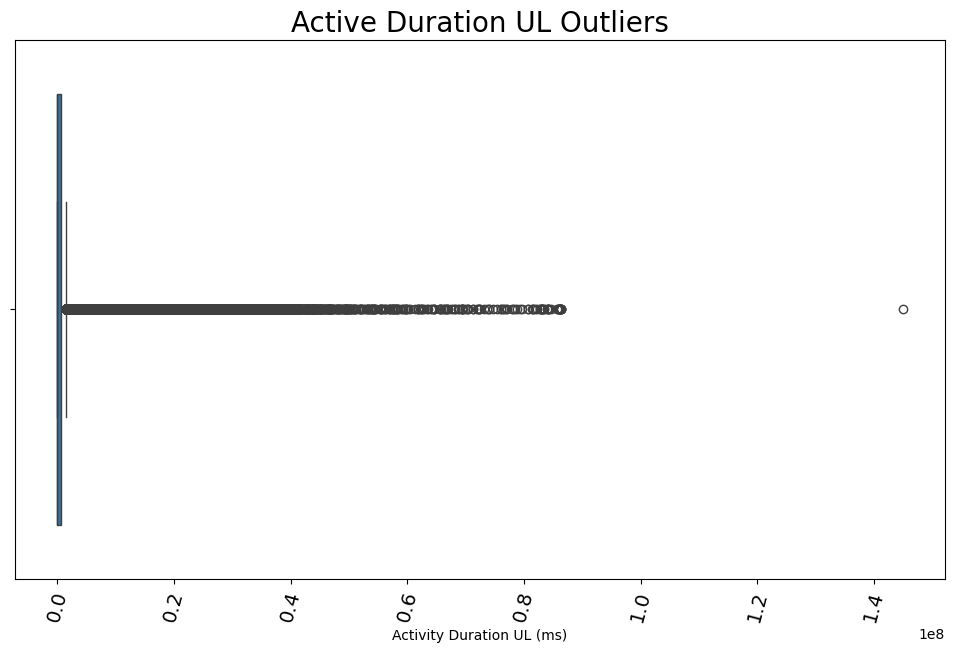

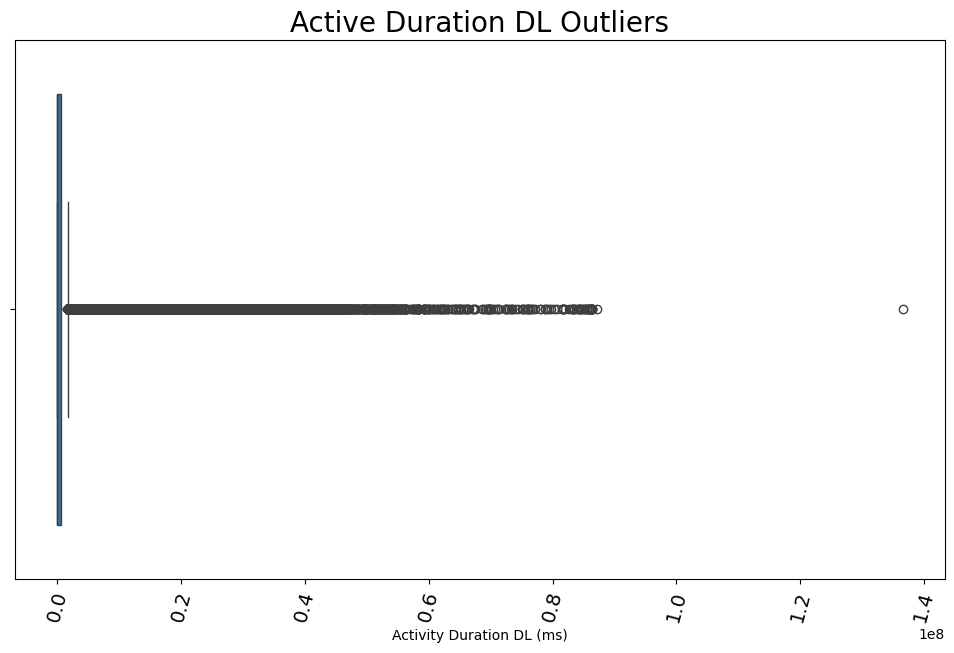

In [119]:
my_pltotter.box(df_tele_clean, 'Activity Duration UL (ms)', 'Active Duration UL Outliers')
my_pltotter.box(df_tele_clean, 'Activity Duration DL (ms)', 'Active Duration DL Outliers')

In [120]:
df_tele_clean = df_cleaner.fix_outliers(df_tele_clean)


2023-12-29 11:45:22,452:logger:Fix outliers
2023-12-29 11:45:22,476:logger:Fix outliers


2023-12-29 11:45:22,495:logger:Fix outliers
2023-12-29 11:45:22,517:logger:Fix outliers
2023-12-29 11:45:22,541:logger:Fix outliers
2023-12-29 11:45:22,563:logger:Fix outliers
2023-12-29 11:45:22,583:logger:Fix outliers
2023-12-29 11:45:22,601:logger:Fix outliers
2023-12-29 11:45:22,619:logger:Fix outliers
2023-12-29 11:45:22,638:logger:Fix outliers
2023-12-29 11:45:22,658:logger:Fix outliers
2023-12-29 11:45:22,677:logger:Fix outliers
2023-12-29 11:45:22,697:logger:Fix outliers
2023-12-29 11:45:22,714:logger:Fix outliers
2023-12-29 11:45:22,731:logger:Fix outliers
2023-12-29 11:45:22,748:logger:Fix outliers
2023-12-29 11:45:22,767:logger:Fix outliers
2023-12-29 11:45:22,791:logger:Fix outliers
2023-12-29 11:45:22,811:logger:Fix outliers
2023-12-29 11:45:22,827:logger:Fix outliers
2023-12-29 11:45:22,847:logger:Fix outliers
2023-12-29 11:45:22,874:logger:Fix outliers
2023-12-29 11:45:22,891:logger:Fix outliers
2023-12-29 11:45:22,912:logger:Fix outliers
2023-12-29 11:45:22,936:logger:F

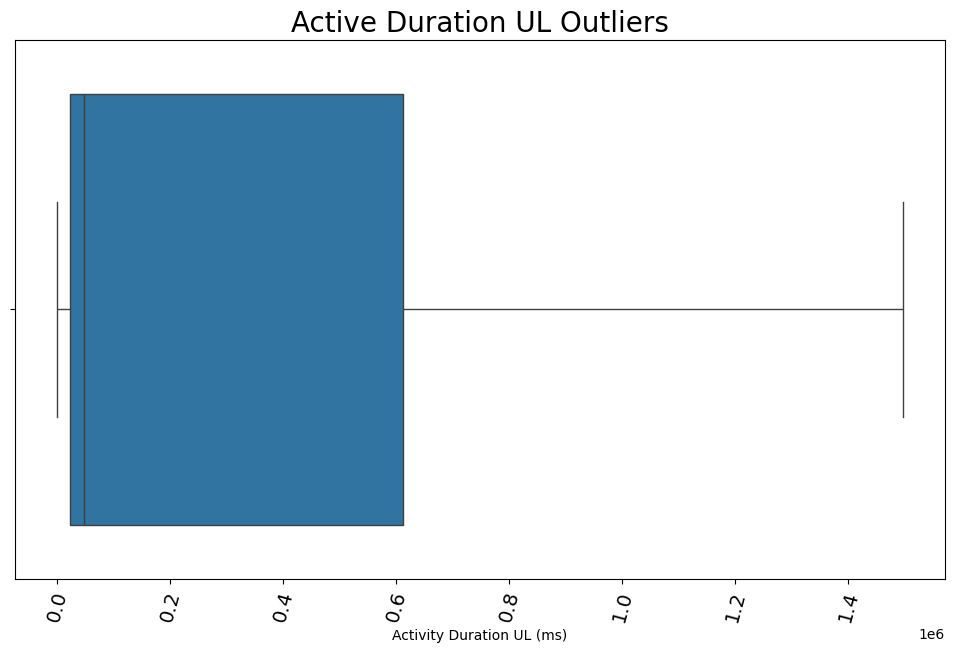

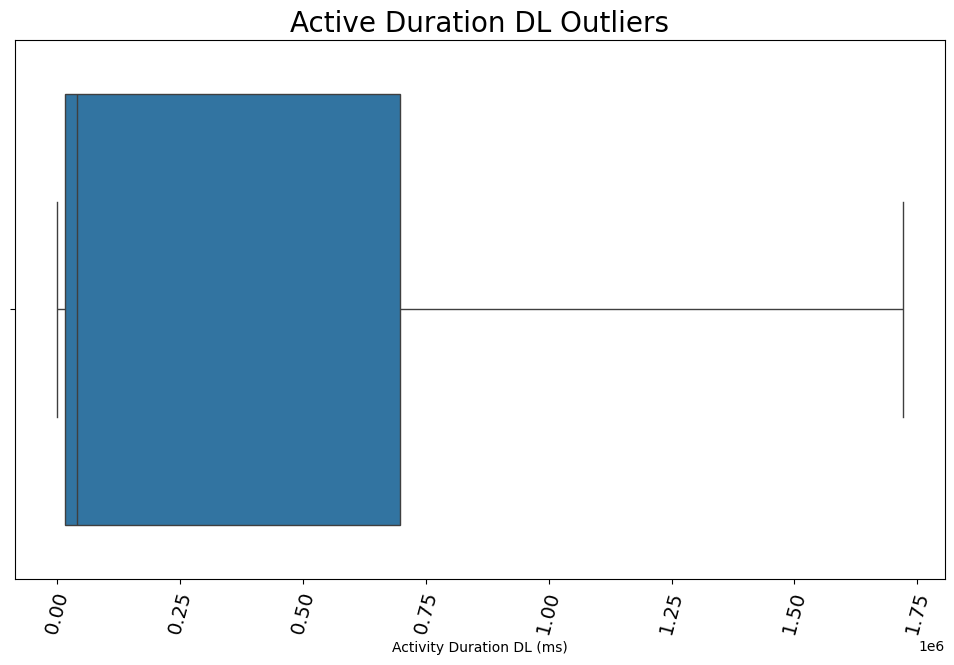

In [121]:
my_pltotter.box(df_tele_clean, 'Activity Duration UL (ms)', 'Active Duration UL Outliers')
my_pltotter.box(df_tele_clean, 'Activity Duration DL (ms)', 'Active Duration DL Outliers')

Combining Download(DL) and Upload(UL) Columns

In [122]:
"""
"This code calculates and aggregates data volumes for different content categories, 
creating new columns for each category and a 'Total Data Volume (Bytes)' column, 
providing a comprehensive view of data consumption across various types."
"""

df_tele_clean['Social Media Data Volume (Bytes)'] = df_tele_clean['Social Media UL (Bytes)'] + df_tele_clean['Social Media DL (Bytes)']
df_tele_clean['Google Data Volume (Bytes)'] = df_tele_clean['Google UL (Bytes)'] + df_tele_clean['Google DL (Bytes)']
df_tele_clean['Email Data Volume (Bytes)'] = df_tele_clean['Email UL (Bytes)'] + df_tele_clean['Email DL (Bytes)']
df_tele_clean['Youtube Data Volume (Bytes)'] = df_tele_clean['Youtube UL (Bytes)'] + df_tele_clean['Youtube DL (Bytes)']
df_tele_clean['Netflix Data Volume (Bytes)'] = df_tele_clean['Netflix UL (Bytes)'] + df_tele_clean['Netflix DL (Bytes)']
df_tele_clean['Gaming Data Volume (Bytes)'] = df_tele_clean['Gaming UL (Bytes)'] + df_tele_clean['Gaming DL (Bytes)']
df_tele_clean['Other Data Volume (Bytes)'] = df_tele_clean['Other UL (Bytes)'] + df_tele_clean['Other DL (Bytes)']
df_tele_clean['Total Data Volume (Bytes)'] = df_tele_clean['Total UL (Bytes)'] + df_tele_clean['Total DL (Bytes)']


In [123]:

df_tele_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 146887 entries, 0 to 149995
Data columns (total 54 columns):
 #   Column                            Non-Null Count   Dtype         
---  ------                            --------------   -----         
 0   Bearer Id                         146887 non-null  int64         
 1   Start                             146887 non-null  datetime64[ns]
 2   Start ms                          146887 non-null  float64       
 3   End                               146887 non-null  datetime64[ns]
 4   End ms                            146887 non-null  float64       
 5   IMSI                              146887 non-null  int64         
 6   MSISDN/Number                     146887 non-null  int64         
 7   IMEI                              146887 non-null  int64         
 8   Last Location Name                146887 non-null  string        
 9   Avg RTT DL (ms)                   146887 non-null  float64       
 10  Avg RTT UL (ms)                   146

In [124]:

df_tele_clean.to_csv('../data/cleaned_tele_data.csv')